## assignment 04: Decision Tree construction

In [ ]:
# If working in colab, uncomment the following line
# ! wget https://raw.githubusercontent.com/girafe-ai/ml-mipt/21f_made/homeworks/assignment0_04_tree/tree.py -nc

In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.base import BaseEstimator
from sklearn.datasets import make_classification, make_regression, load_digits, load_boston
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, mean_squared_error
import pandas as pd

%load_ext autoreload
%autoreload 2

Let's fix the `random_state` (a.k.a. random seed).

In [2]:
RANDOM_STATE = 42

__Your ultimate task for today is to impement the `DecisionTree` class and use it to solve classification and regression problems.__

__Specifications:__
- The class inherits from `sklearn.BaseEstimator`;
- Constructor is implemented for you. It has the following parameters:
    * `max_depth` - maximum depth of the tree; `np.inf` by default
    * `min_samples_split` - minimal number of samples in the leaf to make a split; `2` by default;
    * `criterion` - criterion to select the best split; in classification one of `['gini', 'entropy']`, default `gini`; in regression `variance`;

- `fit` method takes `X` (`numpy.array` of type `float` shaped `(n_objects, n_features)`) and `y` (`numpy.array` of type float shaped `(n_objects, 1)` in regression; `numpy.array` of type int shaped `(n_objects, 1)` with class labels in classification). It works inplace and fits the `DecisionTree` class instance to the provided data from scratch.

- `predict` method takes `X` (`numpy.array` of type `float` shaped `(n_objects, n_features)`) and returns the predicted $\hat{y}$ values. In classification it is a class label for every object (the most frequent in the leaf; if several classes meet this requirement select the one with the smallest class index). In regression it is the desired constant (e.g. mean value for `variance` criterion)

- `predict_proba` method (works only for classification (`gini` or `entropy` criterion). It takes `X` (`numpy.array` of type `float` shaped `(n_objects, n_features)`) and returns the `numpy.array` of type `float` shaped `(n_objects, n_features)` with class probabilities for every object from `X`. Class $i$ probability equals the ratio of $i$ class objects that got in this node in the training set.

    
__Small recap:__

To find the optimal split the following functional is evaluated:
    
$$G(j, t) = H(Q) - \dfrac{|L|}{|Q|} H(L) - \dfrac{|R|}{|Q|} H(R),$$
    where $Q$ is the dataset from the current node, $L$ and $R$ are left and right subsets defined by the split $x^{(j)} < t$.



1. Classification. Let $p_i$ be the probability of $i$ class in subset $X$ (ratio of the $i$ class objects in the dataset). The criterions are defined as:
    
    * `gini`: Gini impurity $$H(R) = 1 -\sum_{i = 1}^K p_i^2$$
    
    * `entropy`: Entropy $$H(R) = -\sum_{i = 1}^K p_i \log(p_i)$$ (One might use the natural logarithm).
    
2. Regression. Let $y_l$ be the target value for the $R$, $\mathbf{y} = (y_1, \dots, y_N)$ – all targets for the selected dataset $X$.
    
    * `variance`: $$H(R) = \dfrac{1}{|R|} \sum_{y_j \in R}(y_j - \text{mean}(\mathbf{y}))^2$$
    
    * `mad_median`: $$H(R) = \dfrac{1}{|R|} \sum_{y_j \in R}|y_j - \text{median}(\mathbf{y})|$$
        


**Hints and comments**:

* No need to deal with categorical features, they will not be present.
* Siple greedy recursive procedure is enough. However, you can speed it up somehow (e.g. using percentiles).
* Please, do not copy implementations available online. You are supposed to build very simple example of the Decision Tree.

File `tree.py` is waiting for you. Implement all the needed methods in that file.

### Check yourself

In [334]:
from tree import entropy, gini, variance, mad_median, DecisionTree

#### Simple check

In [335]:
X = np.ones((4, 5), dtype=float) * np.arange(4)[:, None]
y = np.arange(4)[:, None] + np.asarray([0.2, -0.3, 0.1, 0.4])[:, None]
class_estimator = DecisionTree(max_depth=10, criterion_name='gini')

(X_l, y_l), (X_r, y_r) = class_estimator.make_split(1, 1., X, y)

assert np.array_equal(X[:1], X_l)
assert np.array_equal(X[1:], X_r)
assert np.array_equal(y[:1], y_l)
assert np.array_equal(y[1:], y_r)

#### Classification problem

In [336]:
digits_data = load_digits().data
digits_target = load_digits().target[:, None] # to make the targets consistent with our model interfaces
X_train, X_test, y_train, y_test = train_test_split(digits_data, digits_target, test_size=0.2, random_state=RANDOM_STATE)

In [337]:
assert len(y_train.shape) == 2 and y_train.shape[0] == len(X_train)

In [338]:
print(X_train.shape)

(1437, 64)


In [339]:
class_estimator = DecisionTree(max_depth=10, criterion_name='gini')
class_estimator.fit(X_train, y_train)
ans = class_estimator.predict(X_test)
accuracy_gini = accuracy_score(y_test, ans)
print(f"ans = {ans}")
print(f"y_test = {y_test}")
print(accuracy_gini)

(1437, 10)
(223, 10)
(59, 10)
(13, 10)
(2, 10)
(11, 10)
(46, 10)
(42, 10)
(4, 10)
(2, 10)
(2, 10)
(164, 10)
(14, 10)
(5, 10)
(9, 10)
(5, 10)
(3, 10)
(2, 10)
(4, 10)
(150, 10)
(144, 10)
(2, 10)
(142, 10)
(6, 10)
(3, 10)
(3, 10)
(1214, 10)
(363, 10)
(193, 10)
(84, 10)
(45, 10)
(30, 10)
(2, 10)
(28, 10)
(15, 10)
(3, 10)
(12, 10)
(9, 10)
(3, 10)
(6, 10)
(3, 10)
(3, 10)
(3, 10)
(39, 10)
(26, 10)
(13, 10)
(5, 10)
(3, 10)
(2, 10)
(8, 10)
(109, 10)
(3, 10)
(106, 10)
(102, 10)
(4, 10)
(2, 10)
(2, 10)
(170, 10)
(34, 10)
(17, 10)
(2, 10)
(15, 10)
(17, 10)
(9, 10)
(6, 10)
(3, 10)
(8, 10)
(6, 10)
(2, 10)
(136, 10)
(130, 10)
(6, 10)
(851, 10)
(109, 10)
(97, 10)
(5, 10)
(3, 10)
(2, 10)
(92, 10)
(90, 10)
(2, 10)
(12, 10)
(7, 10)
(4, 10)
(3, 10)
(5, 10)
(3, 10)
(2, 10)
(742, 10)
(629, 10)
(266, 10)
(119, 10)
(112, 10)
(103, 10)
(3, 10)
(100, 10)
(9, 10)
(6, 10)
(3, 10)
(3, 10)
(3, 10)
(7, 10)
(2, 10)
(5, 10)
(147, 10)
(131, 10)
(19, 10)
(3, 10)
(16, 10)
(112, 10)
(28, 10)
(10, 10)
(18, 10)
(84, 10)
(13

In [340]:
y  = np.array([[1.0],[2.0],[3.0]])
n_objects = y.shape[0]
y_mean = np.median(y, axis=0)[0]
y_l = y - y_mean
y_l = np.sum(np.abs(y_l))
y_l/=n_objects
print(y_mean)

2.0


In [342]:
reference = np.array([0.09027778, 0.09236111, 0.08333333, 0.09583333, 0.11944444,
       0.13888889, 0.09930556, 0.09444444, 0.08055556, 0.10555556])

In [343]:
val = np.abs(class_estimator.predict_proba(X_test).mean(axis=0) - reference)
print(sum(val))

0.09103038740096989


In [344]:
class_estimator = DecisionTree(max_depth=10, criterion_name='entropy')
class_estimator.fit(X_train, y_train)
ans = class_estimator.predict(X_test)
print(ans)
print(y_test)
accuracy_entropy = accuracy_score(y_test, ans)
print(accuracy_entropy)

(1437, 10)
(779, 10)
(412, 10)
(179, 10)
(144, 10)
(132, 10)
(119, 10)
(12, 10)
(9, 10)
(3, 10)
(107, 10)
(13, 10)
(8, 10)
(5, 10)
(2, 10)
(3, 10)
(12, 10)
(6, 10)
(6, 10)
(35, 10)
(6, 10)
(2, 10)
(4, 10)
(2, 10)
(2, 10)
(29, 10)
(27, 10)
(2, 10)
(233, 10)
(105, 10)
(95, 10)
(87, 10)
(77, 10)
(10, 10)
(4, 10)
(6, 10)
(8, 10)
(6, 10)
(2, 10)
(10, 10)
(7, 10)
(3, 10)
(128, 10)
(43, 10)
(18, 10)
(13, 10)
(5, 10)
(2, 10)
(3, 10)
(25, 10)
(23, 10)
(2, 10)
(85, 10)
(12, 10)
(6, 10)
(6, 10)
(2, 10)
(4, 10)
(73, 10)
(71, 10)
(2, 10)
(367, 10)
(176, 10)
(64, 10)
(31, 10)
(33, 10)
(15, 10)
(13, 10)
(2, 10)
(18, 10)
(11, 10)
(5, 10)
(6, 10)
(3, 10)
(3, 10)
(7, 10)
(2, 10)
(5, 10)
(112, 10)
(85, 10)
(82, 10)
(5, 10)
(2, 10)
(3, 10)
(77, 10)
(3, 10)
(27, 10)
(11, 10)
(3, 10)
(8, 10)
(2, 10)
(6, 10)
(16, 10)
(191, 10)
(52, 10)
(18, 10)
(9, 10)
(6, 10)
(3, 10)
(9, 10)
(2, 10)
(7, 10)
(34, 10)
(139, 10)
(91, 10)
(82, 10)
(80, 10)
(2, 10)
(9, 10)
(4, 10)
(5, 10)
(3, 10)
(2, 10)
(48, 10)
(36, 10)
(10, 1

In [345]:
print(np.sum(np.abs(class_estimator.predict_proba(X_test).mean(axis=0) - reference)))

0.035185178518518434


In [291]:
assert  0.84 < accuracy_gini < 0.9
assert  0.86 < accuracy_entropy < 0.9
assert np.sum(np.abs(class_estimator.predict_proba(X_test).mean(axis=0) - reference)) < 1e-4

AssertionError: 

Let's use 5-fold cross validation (`GridSearchCV`) to find optimal values for `max_depth` and `criterion` hyperparameters.

In [216]:
param_grid = {'max_depth': range(3,11), 'criterion_name': ['gini', 'entropy']}
gs = GridSearchCV(DecisionTree(), param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-2)

In [217]:
%%time
gs.fit(X_train, y_train)

c:\Users\user\Desktop\made\ml\assignment0_03_tree\tree.py:22: RuntimeWarning: invalid value encountered in divide
  label_log = np.log(label_sum +  EPS)


CPU times: total: 20.3 s
Wall time: 8min 14s


GridSearchCV(cv=5, estimator=DecisionTree(), n_jobs=-2,
             param_grid={'criterion_name': ['gini', 'entropy'],
                         'max_depth': range(3, 11)},
             scoring='accuracy')

In [218]:
gs.best_params_

{'criterion_name': 'entropy', 'max_depth': 8}

In [219]:
assert gs.best_params_['criterion_name'] == 'entropy'
assert 6 < gs.best_params_['max_depth'] < 9

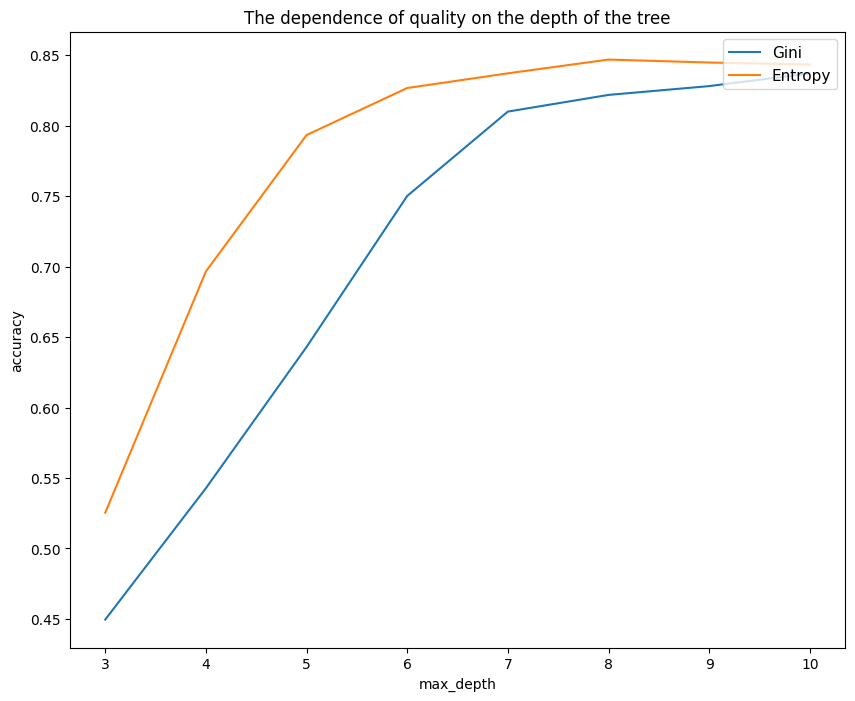

In [220]:
plt.figure(figsize=(10, 8))
plt.title("The dependence of quality on the depth of the tree")
plt.plot(np.arange(3,11), gs.cv_results_['mean_test_score'][:8], label='Gini')
plt.plot(np.arange(3,11), gs.cv_results_['mean_test_score'][8:], label='Entropy')
plt.legend(fontsize=11, loc=1)
plt.xlabel("max_depth")
plt.ylabel('accuracy')
plt.show()

#### Regression problem

In [239]:
regr_data = load_boston().data
regr_target = load_boston().target[:, None] # to make the targets consistent with our model interfaces
RX_train, RX_test, Ry_train, Ry_test = train_test_split(regr_data, regr_target, test_size=0.2, random_state=RANDOM_STATE)

c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the 

In [357]:
from tree import entropy, gini, variance, mad_median, DecisionTree
X = np.array([[1.0],[2.0],[3.0],[4.0],[5.0],[6.0],[7.0],[8.0],[9.0],[10.0],[11.0],[12.0],[13.0],[14.0],[15.0]])
Y = np.array([[1.0],[1.2],[1.4],[1.1],[1.0],[5.5],[6.1],[6.7],[6.4], [6.0], [6.0], [3.0], [3.2], [3.1], [3.0]])
regressor = DecisionTree(max_depth=2, criterion_name='mad_median')
regressor.fit(X ,Y)

 X, delpth = [[ 1.]
 [ 2.]
 [ 3.]
 [ 4.]
 [ 5.]
 [ 6.]
 [ 7.]
 [ 8.]
 [ 9.]
 [10.]
 [11.]
 [12.]
 [13.]
 [14.]
 [15.]],0
 X, delpth = [[1.]
 [2.]
 [3.]
 [4.]
 [5.]],1
 X, delpth = [[1.]
 [2.]
 [3.]],2
proba is [1.2]
 X, delpth = [[4.]
 [5.]],2
proba is [1.05]
 X, delpth = [[ 6.]
 [ 7.]
 [ 8.]
 [ 9.]
 [10.]
 [11.]
 [12.]
 [13.]
 [14.]
 [15.]],1
 X, delpth = [[ 6.]
 [ 7.]
 [ 8.]
 [ 9.]
 [10.]
 [11.]],2
proba is [6.11666667]
 X, delpth = [[12.]
 [13.]
 [14.]
 [15.]],2
proba is [3.075]


In [350]:
from tree import entropy, gini, variance, mad_median, DecisionTree
regressor = DecisionTree(max_depth=3, criterion_name='mad_median')
regressor.fit(RX_train, Ry_train)
predictions_mad = regressor.predict(RX_test)
print(predictions_mad)
print(Ry_test)
mse_mad = mean_squared_error(Ry_test, predictions_mad)
print(mse_mad)

(404, 1)
(322, 1)
(191, 1)
(57, 1)
(134, 1)
(131, 1)
(41, 1)
(90, 1)
(82, 1)
(56, 1)
(51, 1)
(5, 1)
(26, 1)
(10, 1)
(16, 1)
[-1.19205704  3.25434254 -4.31848587  3.25434254 -9.6909791  -1.19205704
 -4.31848587 -4.31848587 -1.19205704 -1.19205704 -4.31848587 -4.31848587
 -9.6909791  -1.19205704 -1.19205704  9.62895554 -4.31848587 -9.6909791
 25.62346535 -9.6909791   3.25434254  3.25434254 -9.6909791  -1.19205704
 -9.6909791  -9.6909791  -1.19205704 -9.6909791  -4.31848587 -1.19205704
 -4.31848587  3.25434254 -7.15653465 -1.19205704 -9.6909791  -9.6909791
  9.62895554 -1.19205704 -4.31848587  3.25434254 -4.31848587  9.62895554
 25.62346535 -1.19205704 -1.19205704 -9.6909791  -9.6909791   3.25434254
 -9.6909791   3.25434254 -1.19205704  9.62895554 -9.6909791   3.25434254
 25.62346535 -1.19205704 -9.6909791   9.62895554 -1.19205704 -4.31848587
 -1.19205704  9.62895554  3.25434254 -1.19205704  3.25434254 -4.31848587
 -9.6909791   3.25434254  3.25434254 -9.6909791  -1.19205704 -1.19205704
 -

In [319]:
np.mean(Ry_train)

3.51753829584208e-17

In [351]:
regressor = DecisionTree(max_depth=1, criterion_name='variance')
regressor.fit(RX_train, Ry_train)
pr =  regressor.predict(RX_train)
print(pr)
predictions_mad = regressor.predict(RX_test)
print(predictions_mad)
print(Ry_test)
mse_var = mean_squared_error(Ry_test, predictions_mad)
print(mse_var)

(404, 1)
(337, 1)
(67, 1)
[-2.84994712 -2.84994712 -2.84994712 -2.84994712 -2.84994712 -2.84994712
 -2.84994712 -2.84994712 -2.84994712 -2.84994712 -2.84994712 -2.84994712
 14.33480863 -2.84994712 14.33480863 -2.84994712 -2.84994712 -2.84994712
 -2.84994712 -2.84994712 -2.84994712 -2.84994712 -2.84994712 -2.84994712
 -2.84994712 14.33480863 -2.84994712 14.33480863 -2.84994712 -2.84994712
 -2.84994712 -2.84994712 -2.84994712 -2.84994712 -2.84994712 -2.84994712
 -2.84994712 -2.84994712 -2.84994712 -2.84994712 -2.84994712 -2.84994712
 -2.84994712 -2.84994712 -2.84994712 -2.84994712 -2.84994712 14.33480863
 -2.84994712 -2.84994712 -2.84994712 -2.84994712 -2.84994712 -2.84994712
 -2.84994712 -2.84994712 14.33480863 -2.84994712 -2.84994712 -2.84994712
 -2.84994712 -2.84994712 -2.84994712 -2.84994712 14.33480863 -2.84994712
 -2.84994712 -2.84994712 -2.84994712 -2.84994712 -2.84994712 14.33480863
 -2.84994712 -2.84994712 -2.84994712 -2.84994712 14.33480863 -2.84994712
 -2.84994712 -2.84994712 

In [224]:
assert 9 < mse_mad < 20
assert 8 < mse_var < 12

AssertionError: 

In [ ]:
param_grid_R = {'max_depth': range(2,9), 'criterion_name': ['variance', 'mad_median']}

In [ ]:
gs_R = GridSearchCV(DecisionTree(), param_grid=param_grid_R, cv=5, scoring='neg_mean_squared_error', n_jobs=-2)
gs_R.fit(RX_train, Ry_train)

In [ ]:
gs_R.best_params_

In [ ]:
assert gs_R.best_params_['criterion_name'] == 'mad_median'
assert 3 < gs_R.best_params_['max_depth'] < 7

In [ ]:
var_scores = gs_R.cv_results_['mean_test_score'][:7]
mad_scores = gs_R.cv_results_['mean_test_score'][7:]

In [ ]:
plt.figure(figsize=(10, 8))
plt.title("The dependence of neg_mse on the depth of the tree")
plt.plot(np.arange(2,9), var_scores, label='variance')
plt.plot(np.arange(2,9), mad_scores, label='mad_median')
plt.legend(fontsize=11, loc=1)
plt.xlabel("max_depth")
plt.ylabel('neg_mse')
plt.show()